<a href="https://colab.research.google.com/github/tombackert/ml-for-ds/blob/main/Project_1_Data_Exploration_and_Processing_of_the_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Data Exploration and Processing of the Iris Dataset/Try your own Dataset


## Introduction
This notebook is designed to guide you through a detailed exploration and processing of the Iris dataset for Project 1. You will analyze three specific features in depth, apply encoding techniques, explore data normalization, and examine feature correlations.

## Import Necessary Libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.datasets import load_iris

## Load the Dataset

In [ ]:
# Load the Iris dataset
data = sns.load_dataset('iris')
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Data Exploration
### Analyze A Specific Feature
Analyze at least 3 different features (here only one feature has been selected)

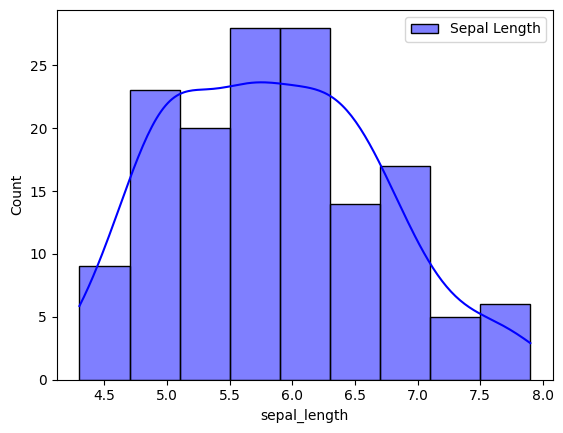

In [ ]:
# Histograms for selected feature
sns.histplot(data['sepal_length'], kde=True, color='blue', label='Sepal Length')
plt.legend()
plt.show()

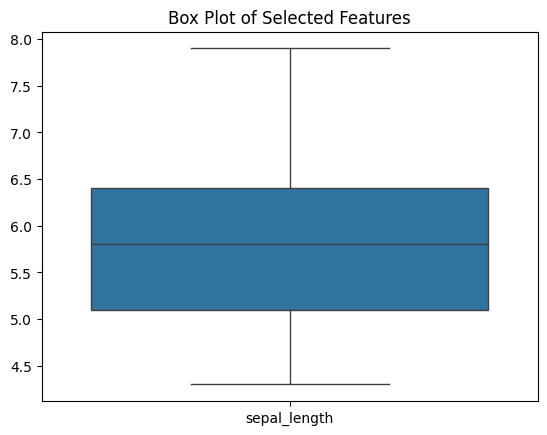

In [ ]:
# Box plots for selected features
sns.boxplot(data=data[['sepal_length']])
plt.title('Box Plot of Selected Features')
plt.show()

### Detailed Analysis
Provide a detailed analysis of each selected variable in this section.


## Feature Encoding
Discuss and apply one-hot encoding vs. ordinal encoding. Identify which features should be encoded in which way.

In [ ]:
# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[['species']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['species']))
data_encoded = pd.concat([data.drop('species', axis=1), encoded_df], axis=1)
print(data_encoded.head())

   sepal_length  sepal_width  petal_length  petal_width  species_setosa  \
0           5.1          3.5           1.4          0.2             1.0   
1           4.9          3.0           1.4          0.2             1.0   
2           4.7          3.2           1.3          0.2             1.0   
3           4.6          3.1           1.5          0.2             1.0   
4           5.0          3.6           1.4          0.2             1.0   

   species_versicolor  species_virginica  
0                 0.0                0.0  
1                 0.0                0.0  
2                 0.0                0.0  
3                 0.0                0.0  
4                 0.0                0.0  


## Normalization
Normalize the 'sepal_length' feature using Min-Max Scaling and Standard Scaling.

In [ ]:
# Normalization using Min-Max Scaling
scaler_min_max = MinMaxScaler()
data['sepal_length_normalized'] = scaler_min_max.fit_transform(data[['sepal_length']])
print("Min-Max Normalized:")
print(data[['sepal_length', 'sepal_length_normalized']].head())

# Standardization using Standard Scaler
scaler_standard = StandardScaler()
data['sepal_length_standardized'] = scaler_standard.fit_transform(data[['sepal_length']])
print("Standard Normalized:")
print(data[['sepal_length', 'sepal_length_standardized']].head())

Min-Max Normalized:
   sepal_length  sepal_length_normalized
0           5.1                 0.222222
1           4.9                 0.166667
2           4.7                 0.111111
3           4.6                 0.083333
4           5.0                 0.194444
Standard Normalized:
   sepal_length  sepal_length_standardized
0           5.1                  -0.900681
1           4.9                  -1.143017
2           4.7                  -1.385353
3           4.6                  -1.506521
4           5.0                  -1.021849


## Correlation Analysis
Study the correlation of each feature using pair plots.

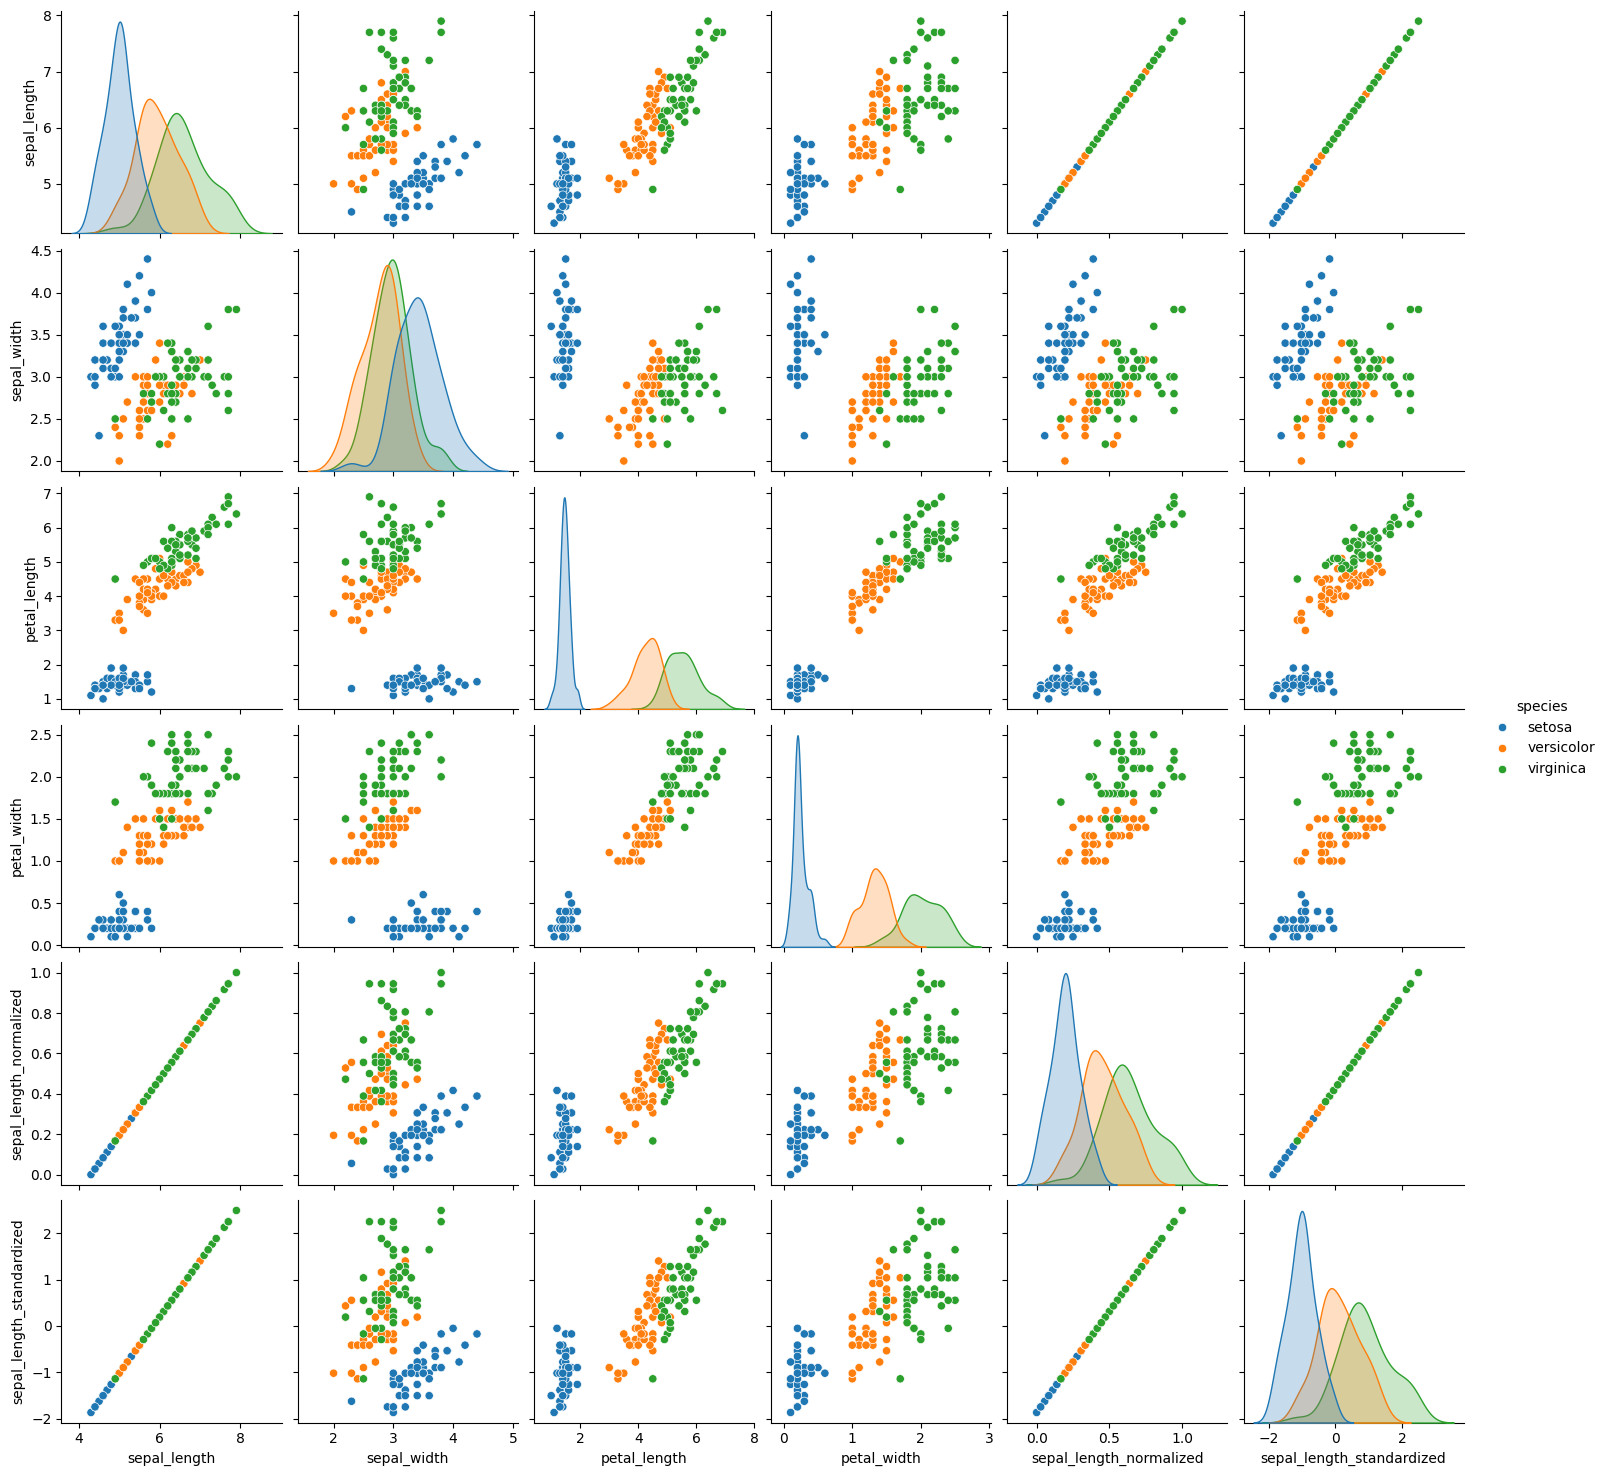

In [ ]:
# Pair plot for correlation analysis
sns.pairplot(data, hue='species')
plt.show()

## Handling Special Cases in Data
Discuss handling zip code as a categorical or numerical feature.

## Reflection
Reflect on the learning from this project, challenges faced, and insights gained.